## Prediction of telemtry data with ARIMA model
Using bus voltage data and ARIMA(5, 1, 0) model

[Source](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

In [1]:
# Import cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [10]:
busVolt = pd.read_csv('./Data/BusVoltage.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
#busVolt.columns = ['Time', 'Bus Voltage']
busVolt.head()

2001-01-21 21:00:00
2001-01-22 00:00:00    31.943952
2001-01-22 03:00:00    32.102344
2001-01-22 06:00:00    31.988111
2001-01-22 09:00:00    31.945055
2001-01-22 12:00:00    31.863640
Name: 32.00318862059671, dtype: float64

In [11]:
model = ARIMA(busVolt, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/home/fatema/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  % freq, ValueWarning)
/home/fatema/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  % freq, ValueWarning)
                              ARIMA Model Results                              
Dep. Variable:     D.32.00318862059671   No. Observations:                51702
Model:                  ARIMA(5, 1, 0)   Log Likelihood               15663.946
Method:                        css-mle   S.D. of innovations              0.179
Date:                 Tue, 22 Sep 2020   AIC                         -31313.892
Time:                         03:54:35   BIC                         -31251.920
Sample:                     01-22-2001   HQIC                        -31294.510
                          - 

<Figure size 720x360 with 0 Axes>

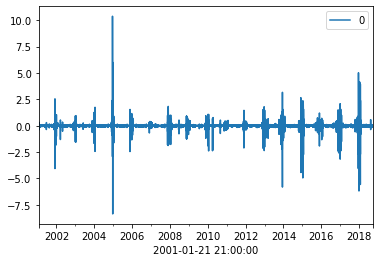

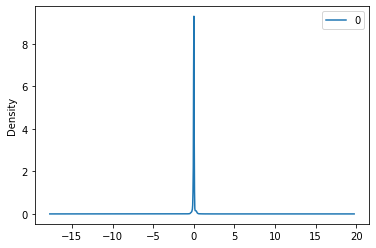

0
count  5.170200e+04
mean   7.159768e-07
std    1.787269e-01
min   -8.356109e+00
25%   -1.941952e-02
50%    1.109109e-03
75%    2.364096e-02
max    1.036823e+01


In [13]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

.876561
predicted=31.907356, expected=31.967079
predicted=31.944674, expected=31.896866
predicted=31.914138, expected=31.953961
predicted=31.940265, expected=31.865061
predicted=31.890079, expected=31.915844
predicted=31.913616, expected=31.893083
predicted=31.902963, expected=31.972675
predicted=31.945783, expected=31.856311
predicted=31.879143, expected=31.892916
predicted=31.892061, expected=31.870088
predicted=31.889423, expected=31.895128
predicted=31.895071, expected=31.913867
predicted=31.899181, expected=31.879639
predicted=31.885391, expected=31.942690
predicted=31.919952, expected=31.855705
predicted=31.880573, expected=31.922006
predicted=31.906703, expected=31.846439
predicted=31.872741, expected=31.868528
predicted=31.872261, expected=31.874495
predicted=31.875996, expected=31.907966
predicted=31.897392, expected=31.934666
predicted=31.910912, expected=31.901572
predicted=31.900168, expected=31.895677
predicted=31.897003, expected=31.853605
predicted=31.877352, expected=31

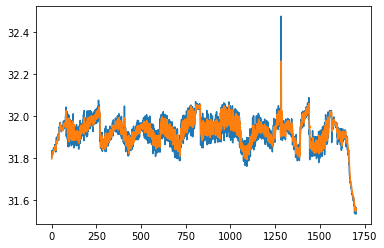

In [14]:
series = busVolt.values
#split_time = int(len(series)*0.66)
split_time = 50000
series_train, series_valid = series[:split_time], series[split_time:]
history = [x for x in series_train]
predictions = list()

for i in range(len(series_valid)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit(disp=0)
    out = model_fit.forecast()
    y_hat = out[0]
    predictions.append(y_hat)
    obs = series_valid[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (y_hat, obs))

mse = mean_squared_error(series_valid, predictions)
mae = mean_absolute_error(series_valid, predictions)
print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)
plt.plot(series_valid)
plt.plot(predictions)
plt.show()